# Aprendizagem Supervisionada *versus* Não-Supervisionada

O objetivo deste notebook é explicar a diferença entre algoritmos de Aprendizagem Supervisionada e Aprendizagem Não-Supervisionada, através de um exemplo simples. 


In [219]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

## Um exemplo simples: Flor Iris

Imagine que queremos desenvolver um aplicativo para smartphone que identifique automaticamente 3 espécies de flores Iris a partir de fotos capturadas pelo smartphone. As 3 espécies são: **setosa**, **versicolor** e **virginica**. Nossa tarefa é criar um demo, baseado em um modelo de aprendizagem de máquina, que usa 4 medidas das flores (comprimento da sépala, largura da sépala, comprimento da pétala, e largura da pétala) e identifica as espécies baseado nas medidas.

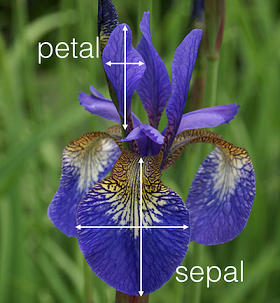

In [220]:
from IPython.display import Image
Image(filename='../figures/iris_petals_sepals.png', width=300)

## 1. Entendendo os dados


In [221]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

   - Cada linha é uma *observação* (também conhecida como: *amostra*, *instâcia*, *registro*)
   - Cada coluna é um *atributo* (também conhecido como: *característica*, *entrada*)

Neste exemplo, o conjunto de dados de flores Iris é formado por 150 amostras (linhas), sendo 50 amostras de cada espécie (classe). De cada amostra foram extraidos 4 atributos numéricos (colunas): comprimento da sépala, largura da sépala, comprimento da pétala, e largura da pétala

In [222]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Ou seja:

- coluna 0: comprimento das sépalas (cm)
- coluna 1: largura das sépalas (cm)
- coluna 2: comprimento das pétalas (cm)
- coluna 3: largura das pétalas (cm)

Além das amostras e suas características, faz parte do conjunto de dados a espécie de cada amostra:

In [223]:
print(iris['target_names'])
print(iris['target'])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- O valor que queremos predizer é conhecido como *rótulo* (também conhecido por *classe*, *saída*)

Neste exemplo, temos 3 possíveis valores para o *rótulo*:

- 0: *setosa*
- 1: *versicolor*
- 2: *virginica*

### Recapitulando

Os dados completos deste exemplo são formados por *amostras* (linhas), caraterizadas por 4 *atributos* (colunas 1 a 4)) e um *rótulo* (coluna 5):

In [224]:
X = iris.data[:,:]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target
df1 = pd.DataFrame(X, columns=['comprimento sepalas', 'largura sepalas','comprimento petalas', 'largura petalas'])
df2 = pd.DataFrame(Y, columns=['rotulo'])
df = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
df.columns.name = 'amostra'

display(df)


amostra,comprimento sepalas,largura sepalas,comprimento petalas,largura petalas,rotulo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Normalizando os dados antes de começar

In [225]:
# normalização correta - por atributo (coluna)
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)
df1 = pd.DataFrame(X_c, columns=['comprimento sepalas', 'largura sepalas','comprimento petalas', 'largura petalas'])
df2 = pd.DataFrame(Y, columns=['rotulo'])
df = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
df.columns.name = 'amostra'

display(df.head()) # Mostra apenas as 5 primeiras linhas da tabela de dados


amostra,comprimento sepalas,largura sepalas,comprimento petalas,largura petalas,rotulo
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


## 2. Aprendizagem Não-Supervisionada

Na Aprendizagem Não-Supervisionada queremos que a máquina encontre sozinha padrões entre os dados apresentados. Este tipo de técnica pode ser entendida como uma forma de ecnontrar rótulos (classes) a partir dos dados. O algoritmo de Aprendizagem Não-Supervisionada busca encontrar qual a combinação entre os atributos dos dados que melhor reflete a estrutura dos dados. Alguns algoritmos exigem que se conheça a quantidade de classes que se busca, outros encontram o número de classes por conta própria.

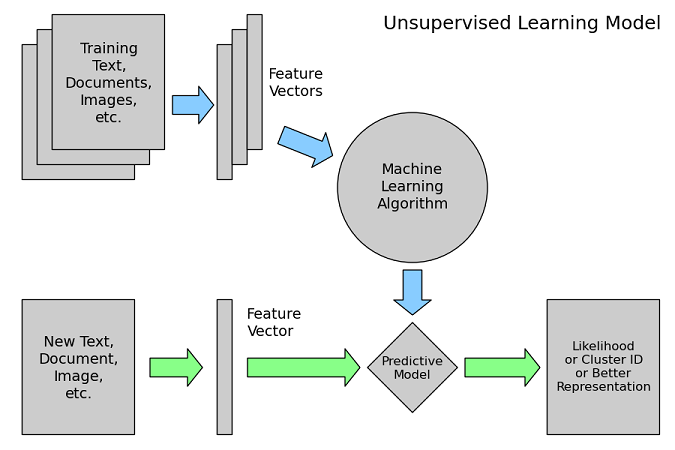

In [226]:
from IPython.display import Image
Image(filename='../figures/unsupervised_learning.png', width=500)

### Clusterização usando K-Means
Neste exemplo vamos usar uma técnica de clusterização bastante comum, conhecida por *K-Means*. O algoritmo de KMeans agrupa os dados tentando separar as amostras em k grupos de igual variância, minimizando um critério de inércia (soma das distâncias de cada uma das amostras ao centróide do cluster). Neste algoritmo o número de grupos (K) precisa ser especificado. 

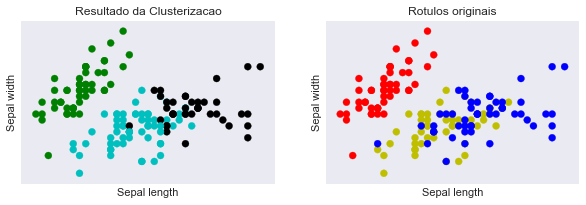

In [227]:
from sklearn.cluster import KMeans
km = KMeans(3, init='random') # Busca 3 classes e inicializa os centróides das 3 classes de forma aleatória
km.fit(X_c)
k = km.predict(X_c) # separa em 3 clusters

# Criando uma figura com 2 gráficos lado a lado
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,3))

# Plotando o resultado da Aprendizagem Não-Supervisionada

colors = np.array(['k','g','c'])
ax1.scatter(X_c[:, 0], X_c[:, 1], c=colors[k]) # Plotando apenas 2 atributos: comprimento e largura das sépalas

ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('Resultado da Clusterizacao')
ax1.set_xticks(())
ax1.set_yticks(())

# Plotando as espécies reais dos dados, para efeito de comparação

colors = np.array(['r','y','b'])
ax2.scatter(X_c[:, 0], X_c[:, 1], c=colors[Y]) # Plotando apenas 2 atributos: comprimento e largura das sépalas

ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Rotulos originais')
ax2.set_xticks(())
ax2.set_yticks(())

plt.show()

Aqui vemos que o resultado da clusterização fez um bom trabalho, principalmente na classe original (vermelha). Porém, onde há uma sobreposição das classes (azul e amarela originais), a clusterização não consegue distingui-las corretamente. É importante perceber que, apesar de conhecermos de antemão os rótulos das amostras de entrada, eles não foram utilizados em nenhum momento para o algoritmo da clusterização. 

## Aprendizagem Supervisionada

No aprendizado supervisionado, a máquina é treinada a partir de um conjunto de exemplos (amostras) e seus respectivos rótulos. A tarefa é construir um estimador que é capaz de predizer o rótulo de uma amostra, dado o seu conjunto de atributos. Os algoritmos de aprendizagem supervisionada podem ser divididos em: *regressão* e *classificação*:

- *regressão*: o rótulo é contínuo. Ex: estimar a idade de uma pessoa dadas medidas dos ossos da mão (idade óssea)
- *classificação*: o rótulo é discreto. Ex: dada uma foto de um objeto, identificar se é um vaso (classe 1) ou uma bicicleta (classe 2)

No nosso exemplo, queremos construir um estimador que seja capaz de predizer a espécie da flor a partir de seus 4 atributos: comprimento da sépala, largura da sépala, comprimento da pétala, e largura da pétala. Como temos apenas 3 rótulos (espécies) categóricos, o que queremos fazer é uma *classificação*.

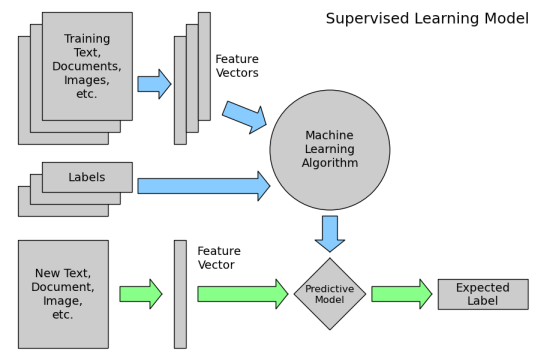

In [228]:
from IPython.display import Image
Image(filename='../figures/supervised_learning.png', width=500)

### Classificação usando kNN
O algoritmo de K vizinhos mais próximos (*k Nearest Neighbors - kNN*) é uma das estratégias mais simples de aprendizado, chamado de "instance-based learning". O algoritmo não tenta construir um modelo, mas simplesmente armazena as instâncias (amsotras) do conjunto de dados. Dada uma nova amostra, busca então no seu conjunto de amostras rotuladas (conhecidas) e procura as k amostras mais próximas, atribuindo o rótulo dos vizinhos mais próximos à nova amostra.


In [229]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

# define o modelo 
knn = neighbors.KNeighborsClassifier(n_neighbors=5) # o rótulo de uma nova amostra será dado pelos 5 viznhos mais próximos

# gera o modelo (simplesmente armazenando todas as instâncias)
knn.fit(X_c, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Visualizando a fronteira de decisão do classificador kNN

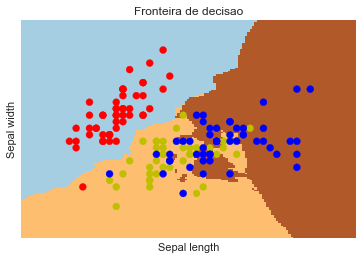

In [230]:
    
# Plota a fronteira de decisão. As cores do fundo representam o rótulo que será atribuido a uma amostra
# dado que seu conjunto de atributos se encontre naquela região

# mais uma vez, gera o modelo (simplesmente armazenando todas as instâncias)
knn.fit(X_c[:,:2], Y) # vamos usar apenas 2 atributos, para poder visualizar a fronteira em um gráfico 2D

h = 0.01  # passo h da grade a ser criada
f = 0.2 # margens da plotagem

# cria uma grade regular com passo h e folga f (aumenta o intervalo dos dados normalizados[0,1] de uma folga f)
xx, yy = np.meshgrid(np.arange(0-f,1+f,h), np.arange(0-folga,1+folga,h))

# usa o modelo gerado anteriormente e prediz a classe para a grade toda
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape[0],xx.shape[1])

# Plota a fronteira de decisão propriamente dita
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plota também os dados de treinamento
colors = np.array(['r','y','b'])
plt.scatter(X_c[:, 0], X_c[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fronteira de decisao')
plt.xticks(())
plt.yticks(())

plt.show()